In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Specify directory/file paths
data_dir = "Data"

# sim_data_file = "DIBS_simulated_fmri_var4model.csv"
sim_data_file = "DIBS_simulated_fmri_VAR1_corr_model.csv"

In [3]:
# Load data
data = pd.read_csv(os.path.join(data_dir, sim_data_file), header=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,19.116246,16.565530,12.415547,18.299480,17.276543,15.754591,16.140283,16.699754,8.404268,11.854886,...,13.878511,6.417796,6.675971,12.511130,16.446791,15.229926,13.449784,10.026379,12.659897,16.061967
1,19.792518,19.305758,18.432122,19.598789,19.390565,19.234885,19.216070,19.378951,17.712553,18.576233,...,18.885059,17.471678,17.575436,18.570558,19.305121,18.991407,18.677850,18.059543,18.527432,19.265571
2,19.121983,19.876964,14.909188,18.882328,16.265094,16.886579,19.313189,14.342573,11.619733,14.133271,...,17.373623,9.282487,8.073071,12.552553,13.669796,14.597934,14.564002,11.974637,13.515495,16.382279
3,20.791987,20.660207,18.516190,22.940047,22.370048,19.327175,20.404752,18.564065,14.274104,17.026338,...,19.755899,16.347811,14.717065,14.199868,17.602043,16.879330,15.547040,13.652054,15.554164,20.579689
4,20.614162,16.734544,18.330194,23.063298,17.598805,19.865324,18.555408,18.876797,13.724560,15.565455,...,14.019824,10.375109,9.326729,11.398092,16.280734,18.053591,14.627125,13.729796,12.034983,18.283346


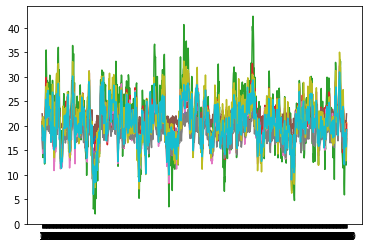

In [4]:
# Plot all results
fig, ax = plt.subplots()
for i in np.arange(1, len(data)+1, 5):
    ax.plot(data.iloc[i, :])

In [5]:
data = data.reset_index(drop=False).rename(columns={"index":"region_id"})
data.head()

,region_id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,19.116246,16.565530,12.415547,18.299480,17.276543,15.754591,16.140283,16.699754,8.404268,...,13.878511,6.417796,6.675971,12.511130,16.446791,15.229926,13.449784,10.026379,12.659897,16.061967
1,1,19.792518,19.305758,18.432122,19.598789,19.390565,19.234885,19.216070,19.378951,17.712553,...,18.885059,17.471678,17.575436,18.570558,19.305121,18.991407,18.677850,18.059543,18.527432,19.265571
2,2,19.121983,19.876964,14.909188,18.882328,16.265094,16.886579,19.313189,14.342573,11.619733,...,17.373623,9.282487,8.073071,12.552553,13.669796,14.597934,14.564002,11.974637,13.515495,16.382279
3,3,20.791987,20.660207,18.516190,22.940047,22.370048,19.327175,20.404752,18.564065,14.274104,...,19.755899,16.347811,14.717065,14.199868,17.602043,16.879330,15.547040,13.652054,15.554164,20.579689
4,4,20.614162,16.734544,18.330194,23.063298,17.598805,19.865324,18.555408,18.876797,13.724560,...,14.019824,10.375109,9.326729,11.398092,16.280734,18.053591,14.627125,13.729796,12.034983,18.283346


In [6]:
long_data = pd.melt(data, id_vars="region_id", var_name="time_index")
long_data[['region_id', 'time_index']] = long_data[['region_id', 'time_index']].astype('int')
long_data

,region_id,time_index,value
0,0,0,19.116246
1,1,0,19.792518
2,2,0,19.121983
3,3,0,20.791987
4,4,0,20.614162
...,...,...,...
49995,45,999,18.496126
49996,46,999,19.176459
49997,47,999,20.510406
49998,48,999,18.363632


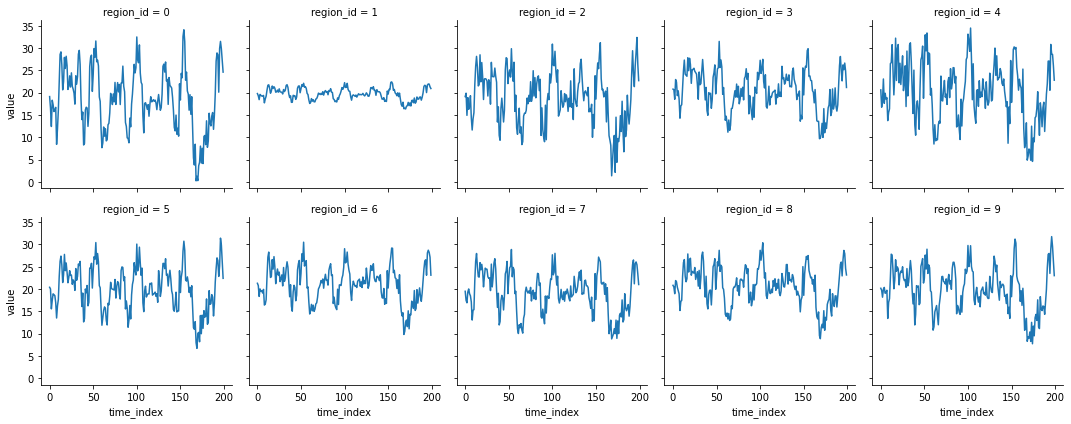

In [7]:
data_subset = long_data.loc[(long_data['region_id'] <10) & (long_data['time_index'] < 200)]
g = sns.FacetGrid(data_subset, col="region_id", col_wrap=5)
g.map_dataframe(sns.lineplot, x="time_index", y="value")